***PROBLEM STATEMENT***

Use the Iris dataset to develop a model that can classify iris flowers into different species based on their sepal and peta 
measurements. This dataset is widely used for introductryo
classification tasks.

***IMPORTING LIBRARIES***

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn import tree,svm
from sklearn.neighbors import KNeighborsClassifier

***IMPORTING DATASET***

In [38]:
df=pd.read_csv("C:\\Users\\Smita Akolkar\\Downloads\\IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


***Data Description***

1.sepal_length=sepal length in cm
2.sepal_width= width in cm
3.petal_length= length in cm
4.petal_width= width in cm
class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [40]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [41]:
from sklearn.preprocessing import LabelEncoder
le_species=LabelEncoder()
df["species"]=le_species.fit_transform(df["species"])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Now,0=Iris Setosa
    1=Iris Versicolour
    2=Iris Virginica

In [42]:
setosa=(df["species"]==0).shape
setosa

(150,)

In [43]:
versicolour=(df["species"]==1).shape
versicolour

(150,)

In [44]:
virginica=(df["species"]==2).shape
virginica

(150,)

In [45]:
from sklearn.preprocessing import StandardScaler
y=df["species"]
x=df.drop(["species"],axis="columns")
scaler=StandardScaler()
scalar_x=scaler.fit_transform(x)

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scalar_x,y,test_size=0.2,random_state=42)

In [50]:
print("shape of x_train:" ,x_train.shape)
print("shape of x_test:" ,x_test.shape)
print("shape of y_train:" ,y_train.shape)
print("shape of y_test:" ,y_test.shape)

shape of x_train: (120, 4)
shape of x_test: (30, 4)
shape of y_train: (120,)
shape of y_test: (30,)


***KNN Classifier***

In [54]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [63]:
##Make Prediction on test data
pred_y=knn.predict(x_test)


##Accuracy of the model
accuracy=knn.score(x_test,y_test)

print("Accuracy of KNN Classifier is : ",accuracy)

Accuracy of KNN Classifier is :  1.0


KNN gives 100% Accuracy

In [64]:
from sklearn.metrics import confusion_matrix,classification_report

##Confusion Matrix


conf_matrix=confusion_matrix(y_test,pred_y)

print("\nconfusion matrix:\n",conf_matrix)


confusion matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [67]:
##Classification Report
class_report=classification_report(y_test,pred_y)

print("\nClassification Report:\n",class_report)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



***KMeans***

In [81]:
from sklearn.cluster import KMeans


##We will take cluster size as 3 because we have three component
kmeans=KMeans(n_clusters=3,random_state=42)
kmeans.fit(scalar_x)


KMeans(n_clusters=3, random_state=42)

In [83]:
##Finding the Accuracy of the model

from sklearn.metrics import silhouette_score


clusters=kmeans.labels_

silhouette_avg = silhouette_score(scalar_x, clusters)

print("Silhouette Score for K-Means Clustering:", silhouette_avg)


Silhouette Score for K-Means Clustering: 0.4787241921049546


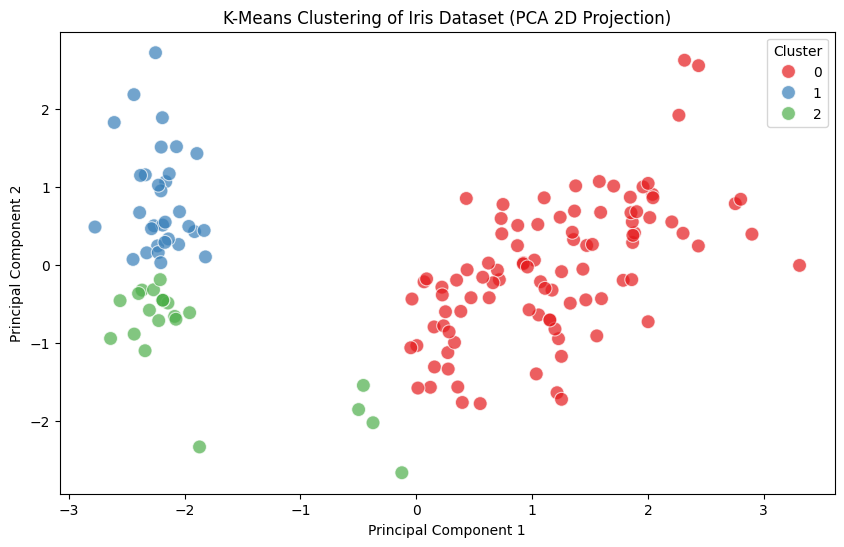

In [84]:
from sklearn.decomposition import PCA



# Reduce the feature space to 2D for visualization

pca = PCA(n_components=2)

X_pca = pca.fit_transform(scalar_x)



# Plotting the clusters

plt.figure(figsize=(10, 6))

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set1', s=100, alpha=0.7)

plt.title("K-Means Clustering of Iris Dataset (PCA 2D Projection)")

plt.xlabel("Principal Component 1")

plt.ylabel("Principal Component 2")

plt.legend(title="Cluster")

plt.show()
